# [過学習と学習不足について知る](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ja)

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Exploration

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension = NUM_WORDS)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

# Modeling

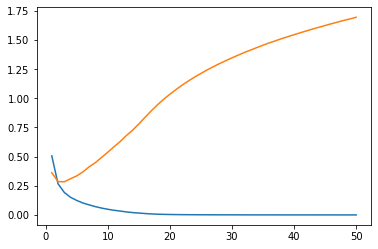

In [16]:
## Baseline ##

baseline = keras.Sequential()
baseline.add(keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)))
baseline.add(keras.layers.Dense(16, activation='relu'))
baseline.add(keras.layers.Dense(1, activation='sigmoid'))

baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

baseline_history = baseline.fit(train_data, train_labels, epochs=50, batch_size=512, validation_data=(test_data, test_labels), verbose=0)

base_history = baseline_history.history
loss = base_history['loss']
val_loss = base_history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

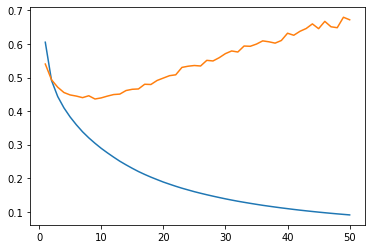

In [18]:
## Small ##

small = keras.Sequential()
small.add(keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)))
small.add(keras.layers.Dense(4, activation='relu'))
small.add(keras.layers.Dense(1, activation='sigmoid'))

small.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

small_history = small.fit(train_data, train_labels, epochs=50, batch_size=512, validation_data=(test_data, test_labels), verbose=0)

small_history = small_history.history
loss = small_history['loss']
val_loss = small_history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

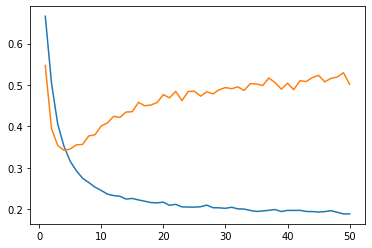

In [4]:
## Regulation + Dropout##

reg = keras.Sequential()
reg.add(keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(NUM_WORDS,)))
reg.add(keras.layers.Dropout(0.5))
reg.add(keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), ))
reg.add(keras.layers.Dropout(0.5))
reg.add(keras.layers.Dense(1, activation='sigmoid'))

reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

reg_history = reg.fit(train_data, train_labels, epochs=50, batch_size=512, validation_data=(test_data, test_labels), verbose=0)

reg_history = reg_history.history
loss = reg_history['loss']
val_loss = reg_history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)